<h1>Activity 3: K-means clustering with Pew Data</h1>

Loading required libraries.

In [1]:
library(dplyr)
library(ggplot2)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Reading the csv file.

In [2]:
maindata <- read.csv(file="data/J1.csv", header=TRUE)
maindata

psraid,sample,int_date,Date.formatted,lang,usr,cregion,state,form,sex,...,hisp,birth_hisp,race,inc,ql1a,qc1,zipcode,weight,standwt,X0
100006,1,61015,10-06-15,1,S,3,51,1,2,...,2,NA,1,99,NA,NA,20112,2.258065,0.7209406,NA
100009,1,61015,10-06-15,1,U,3,24,2,2,...,2,NA,2,6,NA,NA,21239,2.548387,0.8136330,NA
100011,1,61015,10-06-15,1,S,2,39,2,2,...,2,NA,1,3,NA,NA,44730,1.806452,0.5767525,NA
100039,1,61015,10-06-15,1,S,3,37,2,2,...,2,NA,1,6,NA,NA,27028,5.032258,1.6066676,NA
100040,1,61015,10-06-15,1,U,3,21,1,2,...,2,NA,1,3,2,NA,40511,7.161290,2.2864116,NA
100043,1,62215,22-06-15,1,R,2,20,1,2,...,2,NA,1,8,NA,NA,67601,1.000000,0.3192737,NA
100049,1,61015,10-06-15,1,R,1,42,1,1,...,2,NA,1,99,NA,NA,15748,1.387097,0.4428635,NA
100051,1,61915,19-06-15,1,R,2,26,1,1,...,2,NA,1,7,NA,NA,49690,1.645161,0.5252567,NA
100058,1,61015,10-06-15,1,R,3,40,2,1,...,2,NA,1,6,NA,NA,73655,1.000000,0.3192737,NA
100059,1,61015,10-06-15,1,U,1,23,1,1,...,2,NA,1,3,NA,NA,4412,2.935484,0.9372228,NA


In [3]:
summary(maindata)

     psraid           sample        int_date      Date.formatted
 Min.   :100006   Min.   :1.00   Min.   :61015   24-06-15: 186  
 1st Qu.:102765   1st Qu.:1.00   1st Qu.:62115   23-06-15: 182  
 Median :201182   Median :2.00   Median :62415   22-06-15: 155  
 Mean   :167354   Mean   :1.65   Mean   :63683   02-07-15: 142  
 3rd Qu.:203261   3rd Qu.:2.00   3rd Qu.:62915   20-06-15: 136  
 Max.   :205508   Max.   :2.00   Max.   :71215   29-06-15: 132  
                                                 (Other) :1068  
      lang       usr        cregion          state            form      
 Min.   :1.000   R:375   Min.   :1.000   Min.   : 1.00   Min.   :1.000  
 1st Qu.:1.000   S:971   1st Qu.:2.000   1st Qu.:13.00   1st Qu.:1.000  
 Median :1.000   U:655   Median :3.000   Median :29.00   Median :2.000  
 Mean   :1.051           Mean   :2.667   Mean   :28.82   Mean   :1.515  
 3rd Qu.:1.000           3rd Qu.:3.000   3rd Qu.:42.00   3rd Qu.:2.000  
 Max.   :2.000           Max.   :4.000   M

Selecting the required columns.

In [4]:
data = select(maindata,sex,race,age,educ2,inc,date2a)
data = na.omit(data)
data = rename(data,onlinedating=date2a)
data

,sex,race,age,educ2,inc,onlinedating
1,2,1,47,6,99,2
2,2,2,63,4,6,2
4,2,1,40,5,6,2
6,2,1,69,6,8,2
9,1,1,77,6,6,2
11,2,1,81,6,99,2
13,1,1,52,4,8,2
14,2,1,74,5,6,2
15,2,1,43,6,98,2
16,2,1,44,4,7,2


Filtering the required data.

In [5]:
data = filter(data,as.numeric(inc) < 97 & as.numeric(educ2) < 97 & as.numeric(age) < 97 & as.numeric(race) < 6 & as.numeric(onlinedating) < 3)

In [6]:
lapply(data,unique)

$sex
[1] 2 1

$race
[1] 2 1 3 4 5

$age
 [1] 63 40 69 77 52 74 44 68 58 36 76 57 19 45 60 67 81 73 37 61 43 72 66 59 56
[26] 54 51 34 55 82 62 46 22 53 18 64 49 21 75 50 39 65 35 85 26 80 32 47 31 30
[51] 42 71 70 48 20 38 79 78 24 33 28 23 25 27 29 41 83

$educ2
[1] 4 5 6 8 7 3 2 1

$inc
[1] 6 8 7 4 2 9 5 1 3

$onlinedating
[1] 2 1

We will have to normalize age parameter in 1 to 10 as other parameters are in 1 to 10. IF we don't do so, age will dominate the other parameters and hence clusters would not help us to iterpret the right results. To normalize the age, we can take mod af all the age entries. Lets make a function of mod, :

In [7]:
modFn = function(x){
    mod = x%%10
    return (mod)
}

Apply function on age 

In [8]:
data$age <- lapply(data$age, function(x) sapply(x,modFn))

Make it numeric

In [9]:
data$age=as.numeric(data$age)

In [10]:
summary(data)

      sex             race            age            educ2      
 Min.   :1.000   Min.   :1.000   Min.   :0.000   Min.   :1.000  
 1st Qu.:1.000   1st Qu.:1.000   1st Qu.:2.000   1st Qu.:4.000  
 Median :1.000   Median :1.000   Median :4.000   Median :5.000  
 Mean   :1.479   Mean   :1.349   Mean   :4.266   Mean   :5.266  
 3rd Qu.:2.000   3rd Qu.:1.000   3rd Qu.:7.000   3rd Qu.:6.000  
 Max.   :2.000   Max.   :5.000   Max.   :9.000   Max.   :8.000  
      inc         onlinedating 
 Min.   :1.000   Min.   :1.00  
 1st Qu.:4.000   1st Qu.:2.00  
 Median :6.000   Median :2.00  
 Mean   :5.714   Mean   :1.89  
 3rd Qu.:8.000   3rd Qu.:2.00  
 Max.   :9.000   Max.   :2.00  

In [11]:
data

sex,race,age,educ2,inc,onlinedating
2,2,3,4,6,2
2,1,0,5,6,2
2,1,9,6,8,2
1,1,7,6,6,2
1,1,2,4,8,2
2,1,4,5,6,2
2,1,4,4,7,2
1,1,8,8,4,2
1,1,8,6,7,2
2,2,6,8,7,2


In [12]:
feature_df = select(data,sex,race,age,educ2,inc)

We will try to analyze the data for the following question:

DATE2a : Have you ever used a dating app on your cell phone?  <br>
1	Yes <br>
2	No <br>



In [13]:
truelabels.df = data$onlinedating

In [14]:
resultdf = data.frame("k"=character(),"between_SS/total_SS"=character())

<h2> K-means clustering - k=3 </h2>

In [15]:
kmeans_3 = kmeans(feature_df,3)
summary(kmeans_3)

             Length Class  Mode   
cluster      1085   -none- numeric
centers        15   -none- numeric
totss           1   -none- numeric
withinss        3   -none- numeric
tot.withinss    1   -none- numeric
betweenss       1   -none- numeric
size            3   -none- numeric
iter            1   -none- numeric
ifault          1   -none- numeric

In [16]:
kmeans_3

K-means clustering with 3 clusters of sizes 401, 315, 369

Cluster means:
       sex     race      age    educ2      inc
1 1.423940 1.339152 1.778055 5.895262 6.952618
2 1.498413 1.412698 4.187302 3.761905 2.755556
3 1.523035 1.306233 7.037940 5.867209 6.894309

Clustering vector:
   [1] 1 1 3 3 1 1 1 3 3 3 3 3 2 2 2 2 3 1 1 1 3 1 1 2 3 3 3 3 3 1 1 1 3 2 3 1 1
  [38] 2 2 1 3 1 3 3 1 2 1 3 1 1 1 2 2 2 3 1 2 1 3 3 3 1 3 3 3 2 1 3 1 3 2 3 2 1
  [75] 3 1 3 1 3 2 3 2 1 3 1 1 2 1 3 2 3 3 2 1 3 1 3 3 1 3 3 2 1 1 3 3 1 3 2 2 1
 [112] 1 1 2 1 1 2 2 3 3 3 2 1 1 1 1 3 3 1 1 2 1 2 1 1 1 3 1 1 1 1 1 3 1 1 1 3 1
 [149] 1 1 2 2 1 3 3 1 1 1 3 2 3 1 3 2 3 1 2 3 1 1 3 1 2 3 3 2 1 1 2 3 3 1 3 2 3
 [186] 2 3 1 2 1 3 1 2 3 1 3 2 2 2 2 1 1 1 3 1 2 1 3 1 1 2 3 3 3 3 1 2 2 2 1 2 2
 [223] 3 1 3 1 3 3 3 3 2 2 2 1 3 3 3 1 1 3 2 3 2 3 3 1 2 3 2 2 3 3 3 3 1 1 3 3 1
 [260] 1 1 2 2 1 2 3 1 3 3 2 1 2 1 3 1 3 1 1 2 3 3 1 2 1 3 3 1 2 2 1 3 2 3 1 3 3
 [297] 2 1 1 1 2 2 1 1 1 2 3 1 2 1 2 2 2 2 2 2 3 1 3 3 3 2 3 1 2 1 2 2

In [17]:
k3REsult = data.frame("k"="3","between_SS/total_SS"="51.0%")
resultdf = rbind.data.frame(resultdf,k3REsult) 

<B> Interpretation </B>

The between_SS/total_SS = 51% <br>


Now using this we will plot various graphs to see the distribution of data among the clusters.

<li><h3>1. Age vs Education Level </h3>

We will plot a graph of age vs education level for k=3 clusters using qplot and try to analyze it.

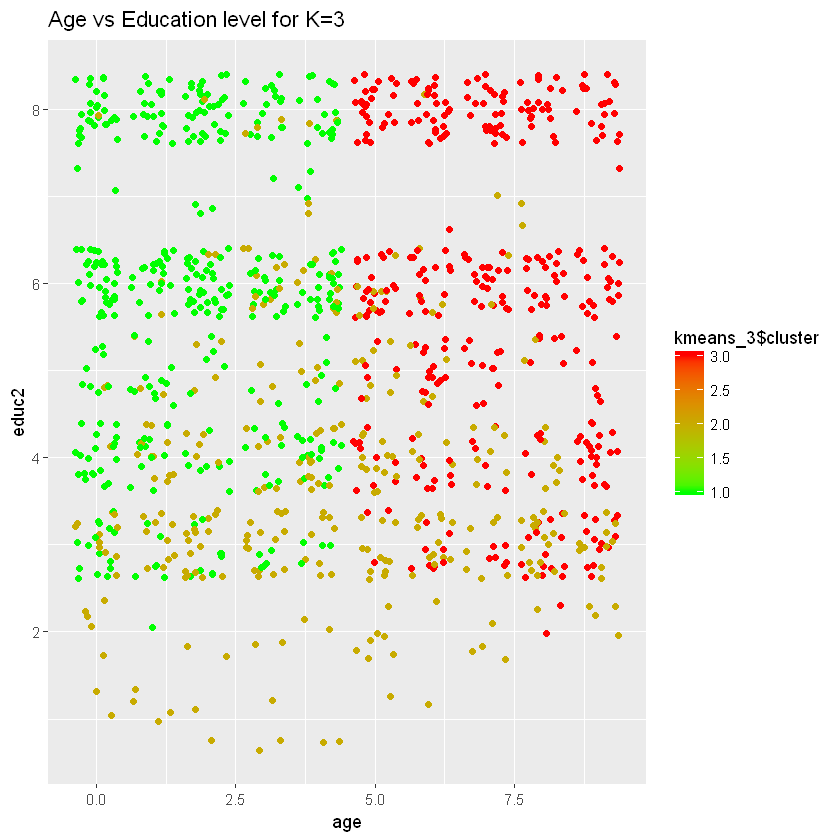

In [18]:
graph1 = qplot(age,educ2,colour=kmeans_3$cluster,data=feature_df, geom="jitter")+
scale_colour_gradient(low="green",high="red") + 
ggtitle("Age vs Education level for K=3")
graph1

<B>Interpretation :</B> The above graph shows us the distributions of the clusters across age and education level. Hence when we get a new point of age and education, we will able to predict its cluster.

<li><h3>2. Age vs Income</h3>

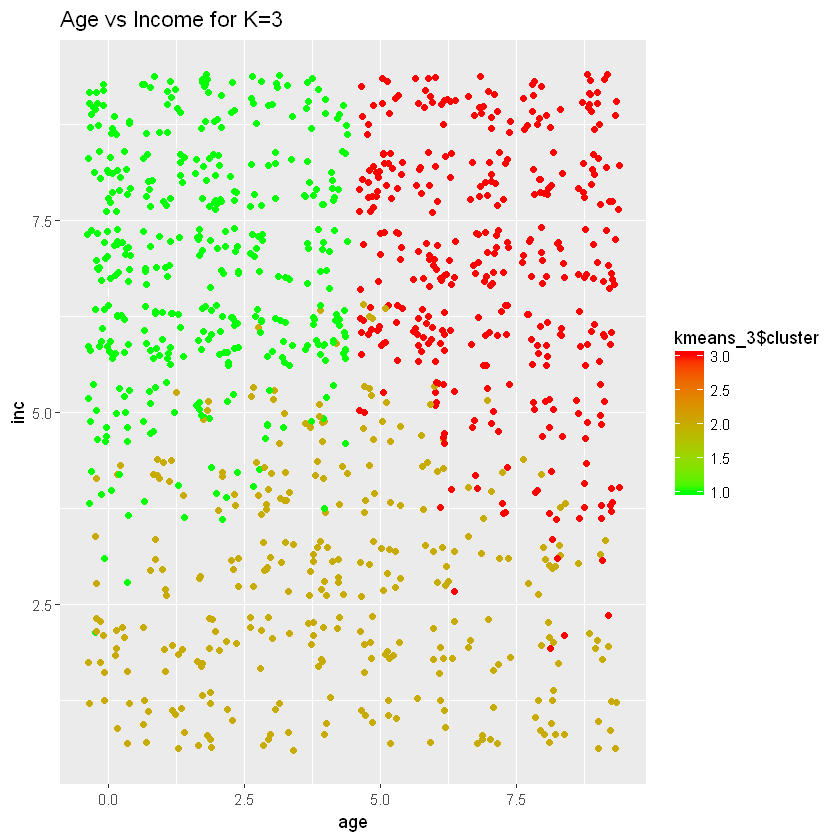

In [19]:
graph11 = qplot(age,inc,colour=kmeans_3$cluster,data=feature_df, geom="jitter")+
scale_colour_gradient(low="green",high="red") + 
ggtitle("Age vs Income for K=3")
graph11

<B>Interpretation :</B> In the above graph we get distribution of points across the clusters.<br>
• 1st cluster - Across the age with lower income.<br>
• 2nd clsuter - Higher income and higher age<br>
• 3rd cluster - Higher income and lower age<br>

<li><h3>3. Income vs True Labels</h3>

Now for better understanding, we will try to predict cluster with the help of income. Hence we will plot the graph of income verses true labels, indicating whether the person uses online dating app or not.

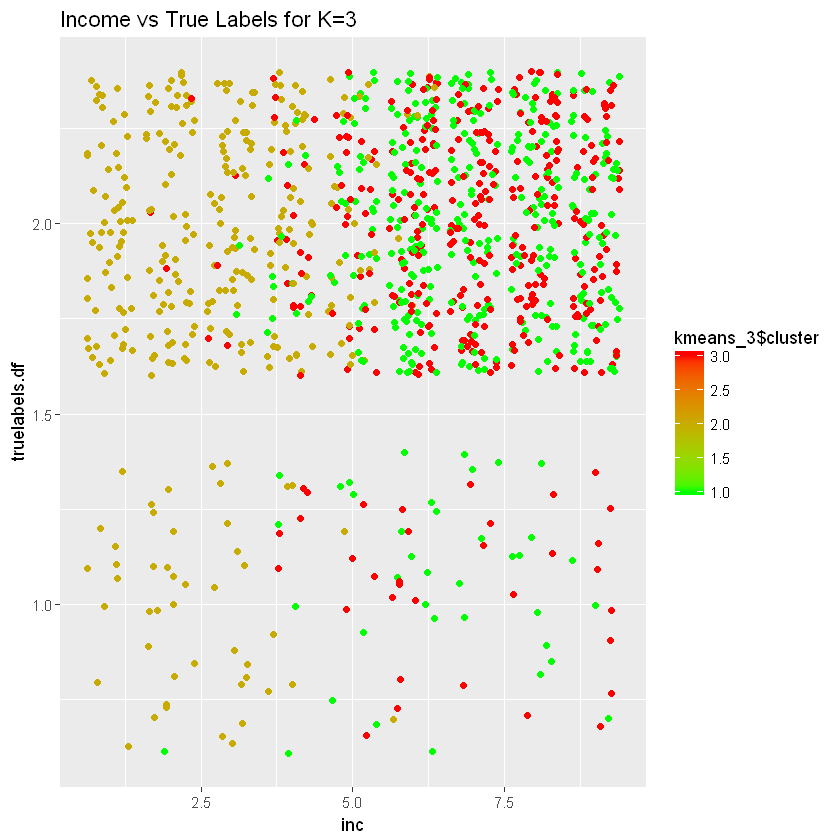

In [20]:
graph2 = qplot(inc,truelabels.df,colour=kmeans_3$cluster, data=feature_df, geom="jitter")+
scale_colour_gradient(low="green",high="red")+
ggtitle("Income vs True Labels for K=3")

graph2

We know that for true labels, 1 = Yes and 2 = No. From the above graph, we can interpret that people with higher income and not using online dating app will fall in first cluster and similarly with lower income and not using online dating app will fall in 3rd cluster. Through the jitter plot, we can say that 1st cluster is dominating one. People using dating app are very less and are spread across the clusters, with 1st cluster somewhat dominating.

Here - <br>
• Lower income will go in 1st cluster either using online dating app or not.<br>
• Higher income people will go either in 2nd cluster or 3rd cluster irrespctive of using online dating app or not.<br>

<h2> K-means clustering - k=5 </h2>

In [21]:
kmeans_5 = kmeans(feature_df,5)
summary(kmeans_5)

             Length Class  Mode   
cluster      1085   -none- numeric
centers        25   -none- numeric
totss           1   -none- numeric
withinss        5   -none- numeric
tot.withinss    1   -none- numeric
betweenss       1   -none- numeric
size            5   -none- numeric
iter            1   -none- numeric
ifault          1   -none- numeric

In [22]:
kmeans_5

K-means clustering with 5 clusters of sizes 287, 186, 198, 253, 161

Cluster means:
       sex     race      age    educ2      inc
1 1.418118 1.317073 1.435540 6.439024 7.299652
2 1.500000 1.440860 1.860215 3.940860 2.892473
3 1.444444 1.353535 4.505051 4.303030 6.217172
4 1.549407 1.288538 7.221344 6.482213 7.426877
5 1.496894 1.391304 7.155280 3.981366 2.838509

Clustering vector:
   [1] 3 1 4 4 1 3 3 4 4 4 4 4 5 3 2 5 5 1 1 1 4 1 1 2 4 4 4 3 4 1 3 1 4 3 4 1 1
  [38] 2 5 1 4 1 4 4 2 2 1 4 1 3 3 3 2 3 4 1 2 1 4 4 4 1 4 5 4 5 1 4 1 4 3 4 5 3
  [75] 5 1 5 1 4 5 5 2 1 4 1 3 2 1 5 5 4 4 5 1 4 3 3 4 3 4 4 2 1 2 4 3 1 4 5 2 1
 [112] 1 1 2 1 1 5 5 4 4 5 2 1 3 2 1 4 4 1 1 5 1 2 1 1 1 3 2 1 1 1 1 4 2 1 1 3 1
 [149] 1 1 5 2 1 3 3 1 2 1 3 3 3 1 4 5 4 3 2 4 1 1 4 1 3 3 4 5 1 3 3 4 4 1 3 5 4
 [186] 2 4 1 3 1 4 1 2 4 3 4 3 5 5 2 1 1 1 4 3 5 1 3 1 1 2 3 4 4 4 1 5 3 5 1 5 2
 [223] 4 1 3 1 4 5 4 3 2 2 2 1 4 4 4 1 1 4 2 4 5 4 4 1 5 5 2 5 4 3 4 5 1 1 4 4 1
 [260] 1 2 2 5 1 2 4 1 4 4 2 3 3 1 4 3 4 1 1 5 

<B> Interpretation </B>

between_SS / total_SS =  63.8 % <br>
As we see the between_ss/total_SS ratio increased as we increase the value of k.

In [23]:
k5REsult = data.frame("k"="5","between_SS/total_SS"="63.8%")
resultdf = rbind.data.frame(resultdf,k5REsult)

<li><h3>4. Age vs Education Level</h3>

We will again plot the graph of age vs education for k=5.

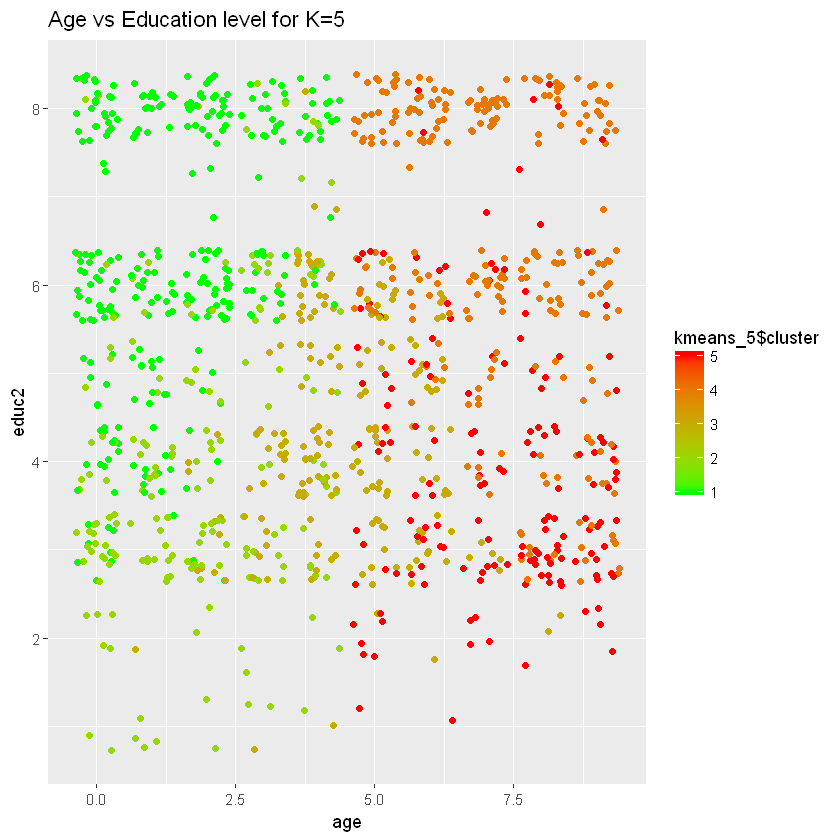

In [24]:
graph4 = qplot(age,educ2,colour=kmeans_5$cluster,data=feature_df, geom="jitter")+ 
scale_colour_gradient(low="green",high="red")+
ggtitle("Age vs Education level for K=5")
graph4

The above graph clearly shows us that 1st cluster is dominating for lower as well as higher age group.

<li><h3>5. Age vs Income</h3>

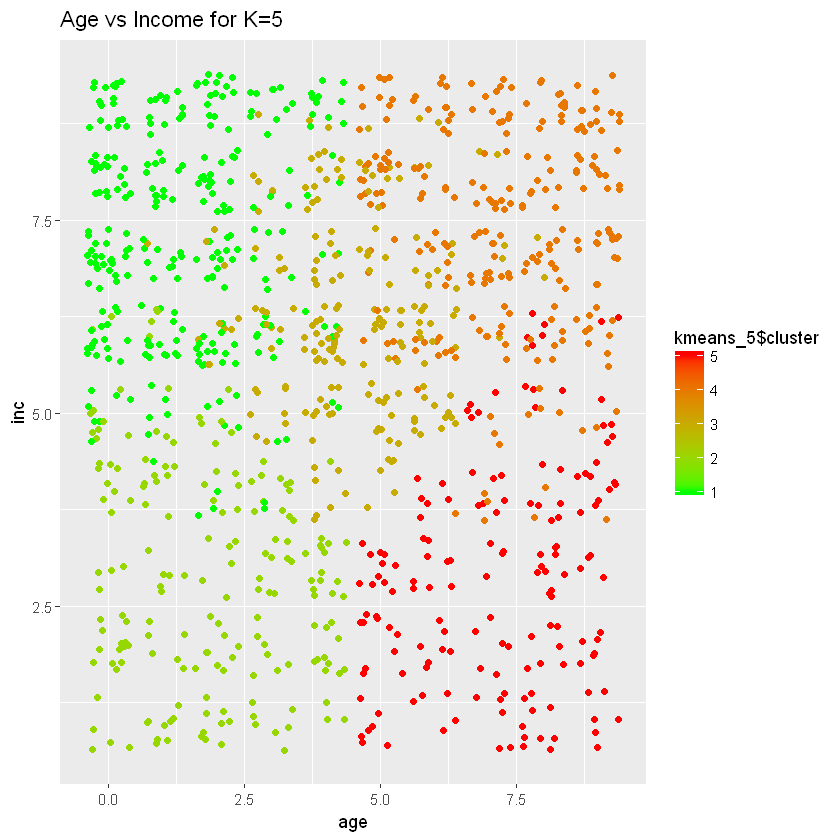

In [25]:
graph41 = qplot(age,inc,colour=kmeans_5$cluster,data=feature_df, geom="jitter")+ 
scale_colour_gradient(low="green",high="red")+
ggtitle("Age vs Income for K=5")
graph41

<li><h3>6. Income vs True Labels</h3>

Now for better understanding, we will try to predict cluster with the help of income. Hence we will plot the graph of income verses true labels, indicating whether the person uses online dating app or not.

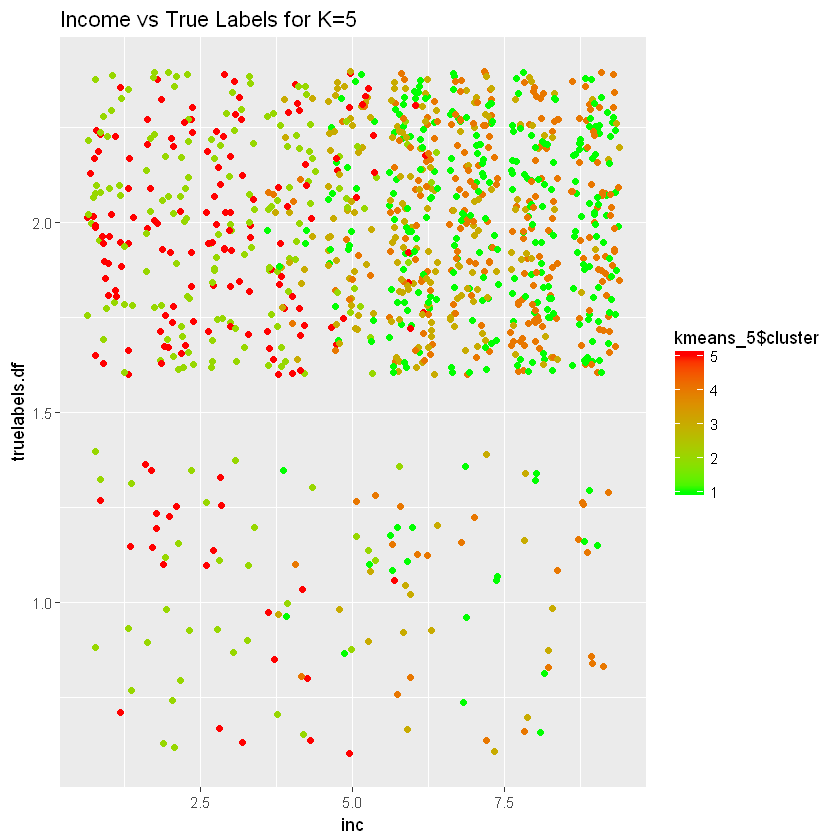

In [26]:
graph5 = qplot(inc,truelabels.df,colour=kmeans_5$cluster, data=feature_df, geom="jitter")+
scale_colour_gradient(low="green",high="red")+
ggtitle("Income vs True Labels for K=5")
graph5

In the above graph, we can see the wide spread of clusters across the lower and higher income with people  not using dating app, 4th cluster giving somewhat being dominating.

<h2>Comparison between k=2 and k=5 clusters.</h2>

In [27]:
library(grid)
library(gridExtra)

Warning message:
"package 'gridExtra' was built under R version 3.3.3"
Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine



We will compare our above graphs when k=3 and k=5, by putting it side by side for better anlaysis.

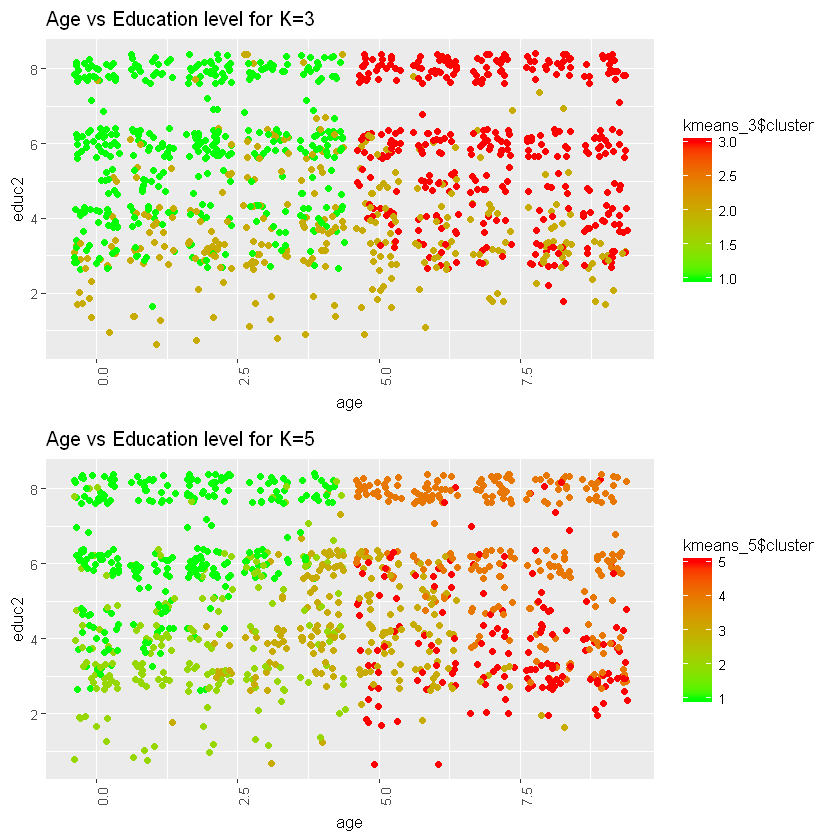

In [28]:
side_graph1 = graph1 + theme(text = element_text(size=10),axis.text.x = element_text(angle=90, hjust=1))
side_graph2 = graph4 + theme(text = element_text(size=10),axis.text.x = element_text(angle=90, hjust=1))
grid.arrange(side_graph1, side_graph2, nrow=2)

In the graph of k=3, having only 3 clusters, we can see that 1st cluster is more dominating than others. While for k=5, we see that points are more or less evenly distributed across the clusters.

The same kind of analysis goes with the other graphs too.

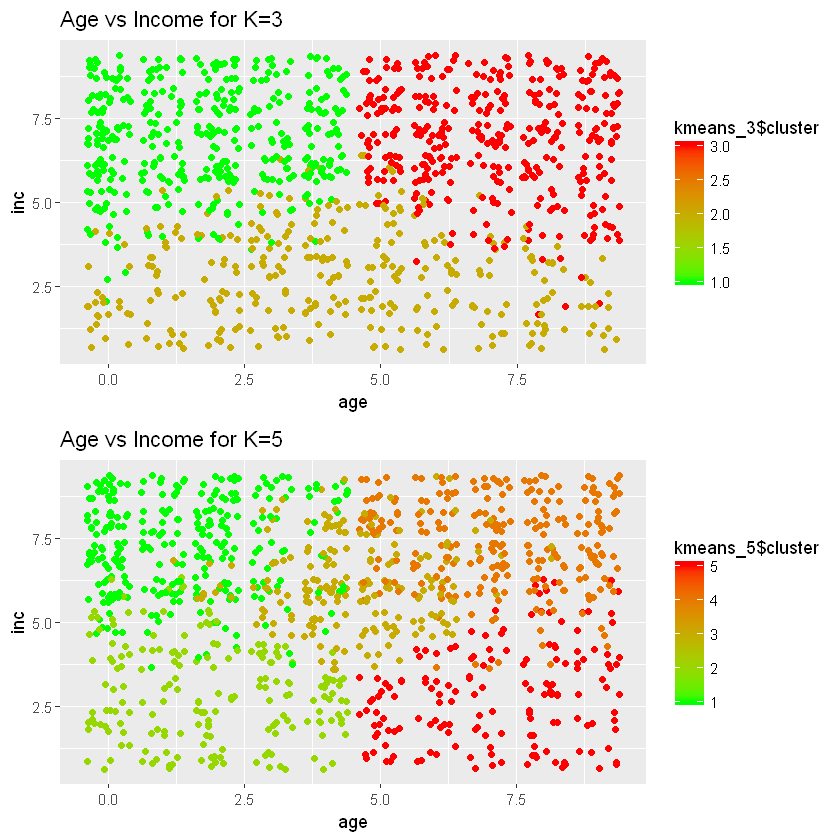

In [29]:
grid.arrange(graph11, graph41, nrow=2)

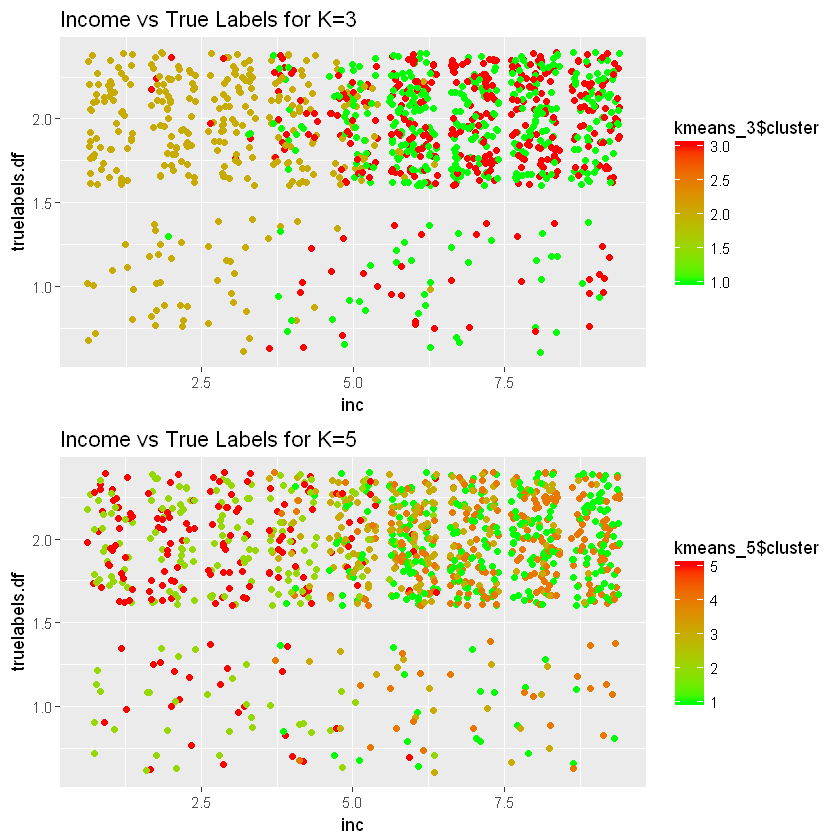

In [30]:
grid.arrange(graph2, graph5, nrow=2)

<h3>Interpreting the Comparison : </h3><br>
The above two graphs, compare the result graph of  k=3 and k=5
k=3 gives us 3 clusters while k=5 gives us 5 clusters. For k=3, it is quite easy to identify the dominating cluster.
But for k=5, looking at the spread of points, it is more or less equal in all clusters.

• Higher the k-value, we find more categories of the data and hence depth of data segmentation is nothing but the k-value. Hence higher k makes more specific categories. <br> 
• Converse is true for lower k-value. Lower k makes more general categories.<br>
• Above graph shows, maximum people belong to the category which do not use online dating app and these people fall in all three clusters.<br>
• Hence when now given a new test data, analyzing iits attributes/features against these data points' features, it will be placed in one the clusters.<br>


<h2> Cluster Plot for k=3 and k=5 </h2>

In [31]:
library(cluster)

$Distances
NULL

$Shading
[1] 18.29113 12.58229 15.12658


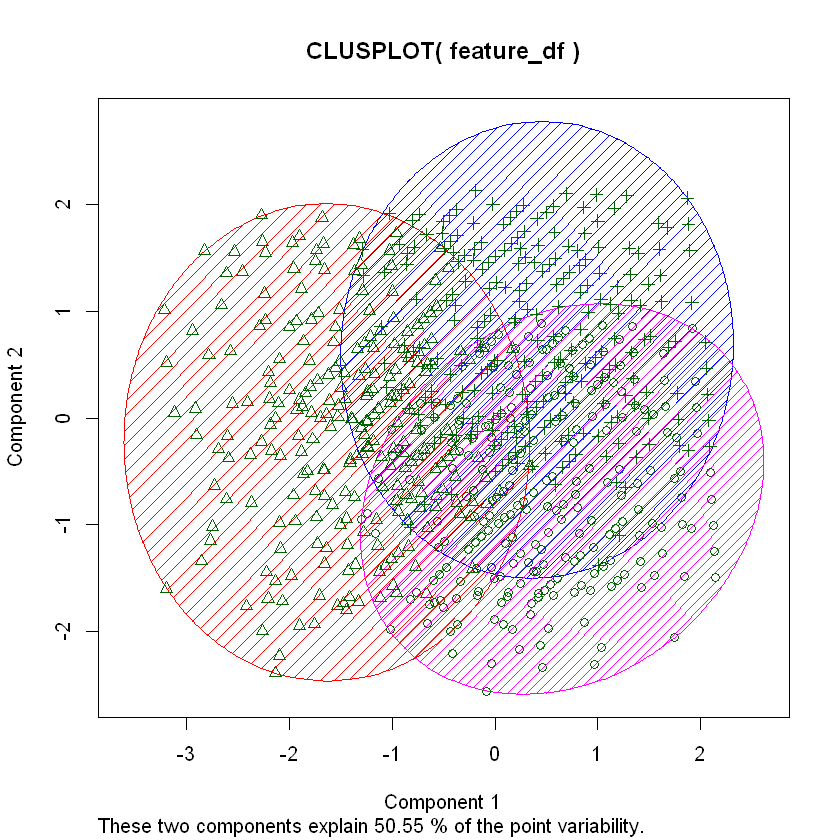

In [32]:
graph3 = clusplot(feature_df, kmeans_3$cluster, color=TRUE, shade=TRUE, labels=1, lines=0)
graph3

$Distances
NULL

$Shading
[1] 14.096801  8.667285 10.299406 11.774807  7.161701


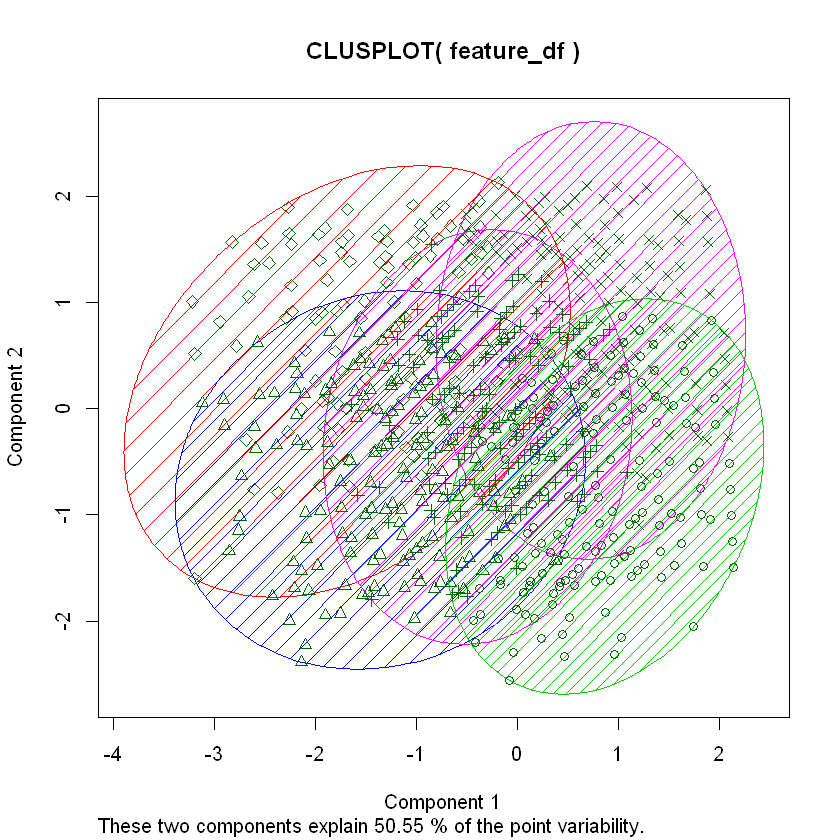

In [33]:
graph6 = clusplot(feature_df, kmeans_5$cluster, color=TRUE, shade=TRUE, labels=1, lines=0)
graph6

<h2> Final Result </h2>

In [34]:
resultdf

k,between_SS.total_SS
3,51.0%
5,63.8%


SS means sum of squares.<br>
Ideally we want a clustering that has the properties of internal cohesion and external separation, i.e. the BSS/TSS ratio should approach 1.<br>
The ratio tells us how good our fit is. <br>
We can see from the table for this data higher the values of k, higher is the ratio, i.e it is good fit.